<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modelling" data-toc-modified-id="Modelling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.-Using-off-the-shelf-trained-models,-perform-sentiment-analysis-on-the-comments-provided-by-customers-and-establish-if-there-is-harmony-between-the-classification/polarity-and-the-likelihood-to-recommend." data-toc-modified-id="1.-Using-off-the-shelf-trained-models,-perform-sentiment-analysis-on-the-comments-provided-by-customers-and-establish-if-there-is-harmony-between-the-classification/polarity-and-the-likelihood-to-recommend.-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>1. Using off the shelf trained models, perform sentiment analysis on the comments provided by customers and establish if there is harmony between the classification/polarity and the likelihood to recommend.</a></span></li><li><span><a href="#Sentiment-Analysis-using-Flair" data-toc-modified-id="Sentiment-Analysis-using-Flair-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Sentiment Analysis using Flair</a></span></li><li><span><a href="#Compare-Sentiment-confidence-and-how-one-is-likely-to-recommend" data-toc-modified-id="Compare-Sentiment-confidence-and-how-one-is-likely-to-recommend-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Compare Sentiment confidence and how one is likely to recommend</a></span></li><li><span><a href="#2.-Using-appropriate-performance-metrics,-compare-various-learning-algorithms-to-determine-the-possibility-of-predicting-the-likelihood-to-respond-to-a-survey-based-on-the-demographic-characteristics-as-well-as-the-time-and-day.-Outline-the-response-variable-definition-process-as-well-as-the-feature-selection-process,-with-a-focus-on-interpretability." data-toc-modified-id="2.-Using-appropriate-performance-metrics,-compare-various-learning-algorithms-to-determine-the-possibility-of-predicting-the-likelihood-to-respond-to-a-survey-based-on-the-demographic-characteristics-as-well-as-the-time-and-day.-Outline-the-response-variable-definition-process-as-well-as-the-feature-selection-process,-with-a-focus-on-interpretability.-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>2. Using appropriate performance metrics, compare various learning algorithms to determine the possibility of predicting the likelihood to respond to a survey based on the demographic characteristics as well as the time and day. Outline the response variable definition process as well as the feature selection process, with a focus on interpretability.</a></span></li></ul></li></ul></li></ul></div>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Ajua_Test

/content/gdrive/MyDrive/Ajua_Test


# Modelling

### 1. Using off the shelf trained models, perform sentiment analysis on the comments provided by customers and establish if there is harmony between the classification/polarity and the likelihood to recommend.

In [3]:
# importing necessary libraries
import pandas as pd
import numpy as np

In [4]:
# loading in the cleaned dataset
# load in the data
data = pd.read_csv("data.csv")

In [5]:
#change all the dashes (-) to NA
new_data = data.replace('-', np.NaN)

In [6]:
new_data.head()

,user_id,year_of_birth,gender,region,living_standards_measure,highest_education,employment,internet_access,cable_tv_subscription,survey_completion,survey_participation_consent,bank_account,bank,last_interaction_with_bank,likelihood_to_recommend,comment_on_why,themes,start_time(GMT),time_of_last_update(GMT)
0,358646,1991.0,Prefer not to answer,NaN,NaN,NaN,Student,Yes,No,TIMEDOUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18:34.6,00:09.9
1,18003003,1984.0,Female,coast,5 to 8,Completed Secondary,Student,Yes,Yes,FINISHED,YES,Yes,KCB,Teller or Branch transactions,5,Safrcom don''t allow 1 person to Bank more tha...,speed/efficiency,00:02.9,16:14.6
2,5618870,1994.0,Male,riftvalley,5 to 8,Completed College,Student,Yes,No,FINISHED,YES,Yes,National Bank,Mobile banking,10,They offer good services,service,00:03.0,05:11.0
3,2951848,1995.0,Female,riftvalley,NaN,NaN,Other/Unemployed,Yes,NaN,TIMEDOUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:03.0,00:09.1
4,17386348,1999.0,Male,coast,9 to 12,In Uni,Student,Yes,Yes,FINISHED,YES,Yes,Equity,Teller or Branch transactions,7,Transaction cost are affordable,"account,rates/charges",00:03.0,03:13.8


In [7]:
new_data['comment_on_why'].isna().sum()

2865

In [8]:
#filter data to have userid, likelihood to recommend and comment on why

comments_data = new_data[['user_id','comment_on_why', 'likelihood_to_recommend']]

In [9]:
# drop NaN rows 

non_na_comments = comments_data.dropna()

In [10]:
len(non_na_comments)

3599

In [11]:
non_na_comments.head(20)

,user_id,comment_on_why,likelihood_to_recommend
1,18003003,Safrcom don''t allow 1 person to Bank more tha...,5
2,5618870,They offer good services,10
4,17386348,Transaction cost are affordable,7
5,2888859,Good service but long queues,7
7,2274344,Convinient,8
8,2273177,They attend customers very fast,8
9,17774579,Services are okay,8
10,5748358,Because is the highly and likely recommend,10
11,18002059,I was served well and quick,10
14,2296678,Equity agents easily available..,10


### Sentiment Analysis using Flair


Flair’s sentiment classifier is based on a character-level LSTM neural network which takes sequences of letters and words into account when predicting

In [12]:
! pip install flair

     |████████████████████████████████| 450kB 8.7MB/s 
     |████████████████████████████████| 19.7MB 1.2MB/s 
     |████████████████████████████████| 798kB 44.7MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
     |████████████████████████████████| 1.3MB 41.5MB/s 
     |████████████████████████████████| 983kB 43.4MB/s 
     |████████████████████████████████| 1.1MB 40.6MB/s 
     |████████████████████████████████| 890kB 47.7MB/s 
     |████████████████████████████████| 2.9MB 37.2MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116678 sha256=7e4658dfee670a29f649385794e790467e391c50bcd95e481a656f5b93c1ac71
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
  Created wheel for ftfy: filename=ftfy-5.8-cp36-none-any.whl size=45613 sha256=cc21d8cee0160a1dd7c0d05a449514a7252e12456bd5471e4f296a9b385361e4
  Stored in directory: /root/.cache/pip/wheels/ba/c0/ef/f28c4da5ac84a4e06ac256ca9182fc34fa57fefffd

In [13]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')
sentence = Sentence('Flair is pretty neat!')
classifier.predict(sentence)

# print sentence with predicted labels
print('Sentence above is: ', sentence.labels)

2021-02-08 16:03:18,178 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_3.1.pt not found in cache, downloading to /tmp/tmp7_cvt2f8


100%|██████████| 266147697/266147697 [00:15<00:00, 16728535.89B/s]

2021-02-08 16:03:34,581 copying /tmp/tmp7_cvt2f8 to cache at /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


2021-02-08 16:03:35,749 removing temp file /tmp/tmp7_cvt2f8
2021-02-08 16:03:36,606 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt



Sentence above is:  [POSITIVE (0.9997)]


In [14]:
def get_sentiment(data):
  sentiment = []
  confidence = []

  for row in data:
    sentence = Sentence(row)
    classifier.predict(sentence)
    sentiment.append(sentence.labels[0].value)
    confidence.append((sentence.labels[0].score*100))

  return sentiment, confidence

In [15]:
sentiment, confidence = get_sentiment(non_na_comments['comment_on_why'])

In [16]:
non_na_comments['sentiment'] = sentiment
non_na_comments['sentiment_confidence'] = confidence

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
non_na_comments['likelihood_to_recommend'] = non_na_comments['likelihood_to_recommend'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Compare Sentiment confidence and how one is likely to recommend

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

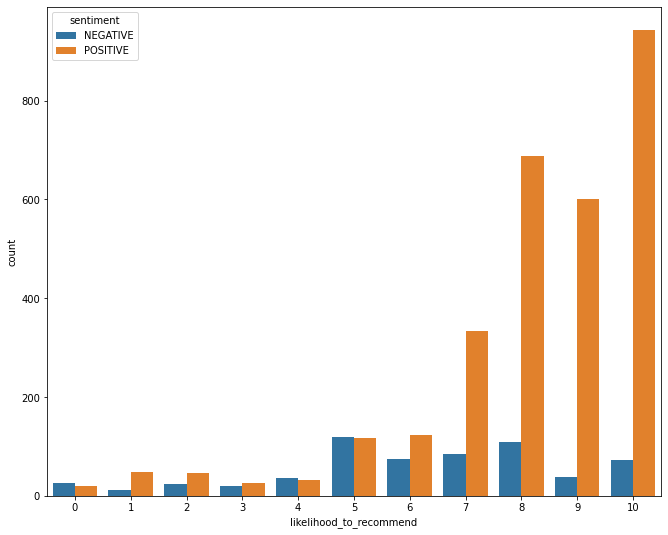

In [19]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.countplot(data=non_na_comments, x='likelihood_to_recommend', hue='sentiment')

In [21]:
cross_data = pd.crosstab(non_na_comments['likelihood_to_recommend'], 
                            non_na_comments['sentiment'],  
                               margins = False) 

cross_data

sentiment,NEGATIVE,POSITIVE
likelihood_to_recommend,,
0,27,21
1,11,48
2,25,47
3,21,26
4,36,32
5,119,118
6,74,124
7,84,334
8,109,688


In [23]:
from scipy.stats import chi2_contingency 

stat, p, dof, expected = chi2_contingency(cross_data)

In [24]:
# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 1.703417430175214e-107
Dependent (reject H0)


The above since p-value < alpha we reject the null hypothesis and conculde that there's some significant relation between the likelihood to recommend and the sentiment.

In [ ]:
non_na_comments.loc[(non_na_comments['likelihood_to_recommend'] == 10) & (non_na_comments['sentiment'] == 'NEGATIVE')]

,user_id,comment_on_why,likelihood_to_recommend,sentiment,sentiment_confidence
97,17406152,Because it gives loans at low interest,10,NEGATIVE,99.229878
119,18002489,Their customer service is at par,10,NEGATIVE,58.626270
209,18002362,because they charge low interest,10,NEGATIVE,99.800450
216,18002776,Their charges are not much,10,NEGATIVE,99.418277
300,17388416,10= Highly likely,10,NEGATIVE,72.225362
...,...,...,...,...,...
6011,2307542,It Is Covenient,10,NEGATIVE,82.864100
6228,2304494,It has branches all over the since it easy to ...,10,NEGATIVE,99.650687
6333,2265404,Conveniency,10,NEGATIVE,60.207731
6348,2292572,Rates are low,10,NEGATIVE,91.243690


The table above shows that there are some false negatives, where the sentiment has been taged as negative because there was lack of context in the comments eg. when the comment is "rates are low" meaning it's cheap, the model tags it as being negative instead of positive.


To improve the model, I would suggest re-training it with some more customer comment data that's tagged as either positive or negative to improve the model

In [ ]:
df_m

comment_on_why         
sentiment                     NEGATIVE POSITIVE
likelihood_to_recommend                        
0                                   27       21
1                                   11       48
2                                   25       47
3                                   21       26
4                                   36       32
5                                  119      118
6                                   74      124
7                                   84      334
8                                  109      688
9                                   38      601
10                                  73      943

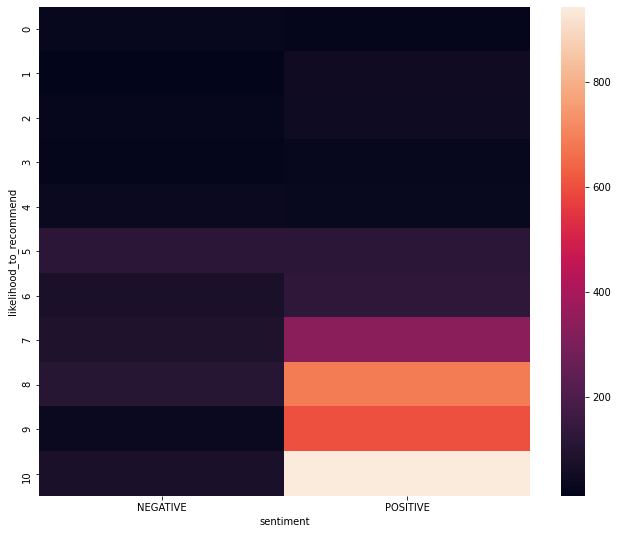

In [25]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(cross_data)
plt.show()

### 2. Using appropriate performance metrics, compare various learning algorithms to determine the possibility of predicting the likelihood to respond to a survey based on the demographic characteristics as well as the time and day. Outline the response variable definition process as well as the feature selection process, with a focus on interpretability.